# Importando BB e Base

In [1]:
# Imports
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score,classification_report,confusion_matrix
from sklearn import svm
import sklearn
import matplotlib
import warnings
from sklearn.tree import DecisionTreeClassifier
warnings.filterwarnings('ignore')

Mounted at /content/drive


In [2]:
# Importando dataset
df=pd.read_csv('/content/Dataset_Banco.csv')

In [3]:
df.head()

,Emprestimo_ID,Genero,Casado,Dependentes,Educacao,Autonomo,RendadoCandidato,RendadoConjugue,ValordoEmprestimo,Valor_doEmprestimo_Prazo,Historico_deCredito,Area_Propriedade,Status_Emprestimo
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Análise Exploratória

![](https://gomesfellipe.github.io/img/2018/05/img1.png)

## a) verificando a estrutura da base

In [4]:
df.shape

(614, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Emprestimo_ID             614 non-null    object 
 1   Genero                    601 non-null    object 
 2   Casado                    611 non-null    object 
 3   Dependentes               599 non-null    object 
 4   Educacao                  614 non-null    object 
 5   Autonomo                  582 non-null    object 
 6   RendadoCandidato          614 non-null    int64  
 7   RendadoConjugue           614 non-null    float64
 8   ValordoEmprestimo         592 non-null    float64
 9   Valor_doEmprestimo_Prazo  600 non-null    float64
 10  Historico_deCredito       564 non-null    float64
 11  Area_Propriedade          614 non-null    object 
 12  Status_Emprestimo         614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RendadoCandidato,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
RendadoConjugue,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
ValordoEmprestimo,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Valor_doEmprestimo_Prazo,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Historico_deCredito,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


## b) tratando valores nulos

Temos 3 opções quanto a valores nulos:


1.   Apagar as linhas com nulo
1.   Rodar uma machine learning pra prever e substituir esses valores nulos
2.   **Atribuir valores de Moda e Média (seguiremos com essa diretriz)**







In [7]:
df.isnull().sum()

Emprestimo_ID                0
Genero                      13
Casado                       3
Dependentes                 15
Educacao                     0
Autonomo                    32
RendadoCandidato             0
RendadoConjugue              0
ValordoEmprestimo           22
Valor_doEmprestimo_Prazo    14
Historico_deCredito         50
Area_Propriedade             0
Status_Emprestimo            0
dtype: int64

In [8]:
#Substituiindo Valores Nulos
df['Genero'].fillna(df['Genero'].mode()[0], inplace=True)
df['Casado'].fillna(df['Casado'].mode()[0], inplace=True)
df['Dependentes'].fillna(df['Dependentes'].mode()[0], inplace=True)
df['Autonomo'].fillna(df['Autonomo'].mode()[0], inplace=True)
df['Historico_deCredito'].fillna(df['Historico_deCredito'].mode()[0], inplace=True)
df['ValordoEmprestimo'].fillna(df['ValordoEmprestimo'].mean(), inplace=True)
df['Valor_doEmprestimo_Prazo'].fillna(df['Valor_doEmprestimo_Prazo'].mean(), inplace=True)

## c) primeiros insights

![](https://s3.amazonaws.com/ibc-portal/wp-content/uploads/2020/08/26170511/insights.jpg)

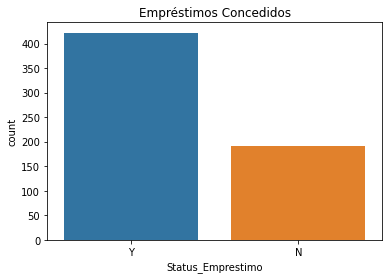

In [25]:
# Proporção de empréstimos concedido
plt.title("Empréstimos Concedidos")
sns.countplot(df['Status_Emprestimo'])

Maior número de aprovação pra quem é casado

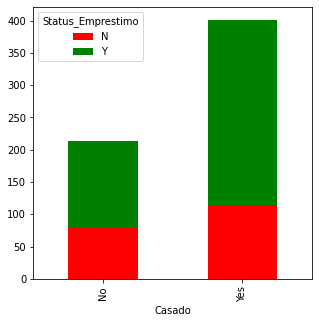

In [11]:
pd.crosstab(df['Casado'], df['Status_Emprestimo']).plot(kind = 'bar',stacked = True,figsize = (5, 5),color = ['red', 'green'])


Candidatos com poucos filhos, são o público que mais pede empréstimos

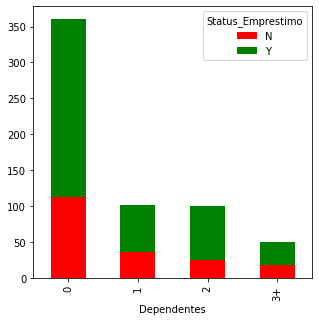

In [107]:
pd.crosstab(df['Dependentes'], df['Status_Emprestimo']).plot(kind = 'bar',stacked = True,figsize = (5, 5),color = ['red', 'green'])

Público concentrado na faixa de renda de até 5k

In [26]:
import plotly.figure_factory as ff
labels = ['Distribuição da Renda']
fig = ff.create_distplot([df.RendadoCandidato], labels, bin_size=5000)
fig.show()

Outlier = clientes com mais de 10k de renda

In [17]:
import plotly.express as px
fig = px.box(df, y='RendadoCandidato')
fig.update_layout( width=600,height=600)
fig.show()

## d) transformando valores categóricos em númericos

In [27]:
# Ajustando as variaveis categóricas
df['Genero']=df['Genero'].map({'Male':1,'Female':0})
df['Casado']=df['Casado'].map({'Yes':1,'No':0})
df['Educacao']=df['Educacao'].map({'Graduate':1,'Not Graduate':0})
df['Dependentes'].replace('3+',3,inplace=True)
df['Autonomo']=df['Autonomo'].map({'Yes':1,'No':0})
df['Area_Propriedade']=df['Area_Propriedade'].map({'Semiurban':1,'Urban':2,'Rural':3})
df['Status_Emprestimo']=df['Status_Emprestimo'].map({'Y':1,'N':0})

# Modelo - Decision Tree

 Escolhemos a decision tree para construção do modelo

![](https://cdn-images-1.medium.com/max/2000/0*cant-HQdfMju-GxG)

In [28]:
X=df.drop(columns=['Emprestimo_ID','Status_Emprestimo']).values
Y=df['Status_Emprestimo'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
print('Shape do X_train=>',X_train.shape)
print('Shape do X_test=>',X_test.shape)
print('Shape do Y_train=>',Y_train.shape)
print('Shape do Y_test=>',Y_test.shape)


Shape do X_train=> (491, 11)
Shape do X_test=> (123, 11)
Shape do Y_train=> (491,)
Shape do Y_test=> (123,)


In [29]:
# Classificador de Decision Tree
df = DecisionTreeClassifier(max_depth=3, criterion = 'entropy', random_state = 7)
df.fit(X_train, Y_train)
df_pred_train = df.predict(X_train)

## Avaliando o modelo

Valores de f1-score do modelo e do teste estão similares, ou seja, não temos indício de overfitting

In [31]:
df_pred_train = df.predict(X_train)
print('Valor no Treino do F1-Score=>',f1_score(Y_train,df_pred_train))
df_pred_test = df.predict(X_test)
print('Valor no Teste do F1-Score=>',f1_score(Y_test,df_pred_test))

Valor no Treino do F1-Score=> 0.8865435356200527
Valor no Teste do F1-Score=> 0.8586956521739131


In [32]:
print('Classification metrics: \n', classification_report(Y_test, df_pred_test))
print('Acurácia: \n', accuracy_score(Y_test, df_pred_test))
print('Confusion Matrix: \n', confusion_matrix(Y_test, df_pred_test))

Classification metrics: 
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

Acurácia: 
 0.7886178861788617
Confusion Matrix: 
 [[18 25]
 [ 1 79]]


In [36]:
![](https://cdn-images-1.medium.com/max/2000/1*c3W5mjgvBRIOFA8ye1JEXg.png)

![](https://drek4537l1klr.cloudfront.net/rhys/v-5/Figures/CH03_FIG_11_MLR.png)

![](https://machinelearningknowledge.ai/wp-content/uploads/2019/05/Overfitting-and-Underfitting-Animation.gif)

/bin/bash: -c: line 0: syntax error near unexpected token `https://cdn-images-1.medium.com/max/2000/1*c3W5mjgvBRIOFA8ye1JEXg.png'
/bin/bash: -c: line 0: `[](https://cdn-images-1.medium.com/max/2000/1*c3W5mjgvBRIOFA8ye1JEXg.png)'
/bin/bash: -c: line 0: syntax error near unexpected token `https://drek4537l1klr.cloudfront.net/rhys/v-5/Figures/CH03_FIG_11_MLR.png'
/bin/bash: -c: line 0: `[](https://drek4537l1klr.cloudfront.net/rhys/v-5/Figures/CH03_FIG_11_MLR.png)'
/bin/bash: -c: line 0: syntax error near unexpected token `https://machinelearningknowledge.ai/wp-content/uploads/2019/05/Overfitting-and-Underfitting-Animation.gif'
/bin/bash: -c: line 0: `[](https://machinelearningknowledge.ai/wp-content/uploads/2019/05/Overfitting-and-Underfitting-Animation.gif)'


# Próximos passos

1.   Uso de machine learning para preencher os campos nulos
2.   Entendimento dos outliers com o time de negócio
3.   Uso de normalização/padronização dos dados
4.   Fazer SMOTE na base de treino balancear o target  
5.   Usar crossvalidation para melhor avaliação do resultado
6.   Mudança nos hiperparâmetros do modelo
7.   Avaliar outros modelos de machine learning de classificação

### # Bora trocar uma ideia?
https://www.linkedin.com/in/mariobibiano/
